## Amazon Alexa Review Sentiment Analysis by Pre-trained Distilled BERT Model

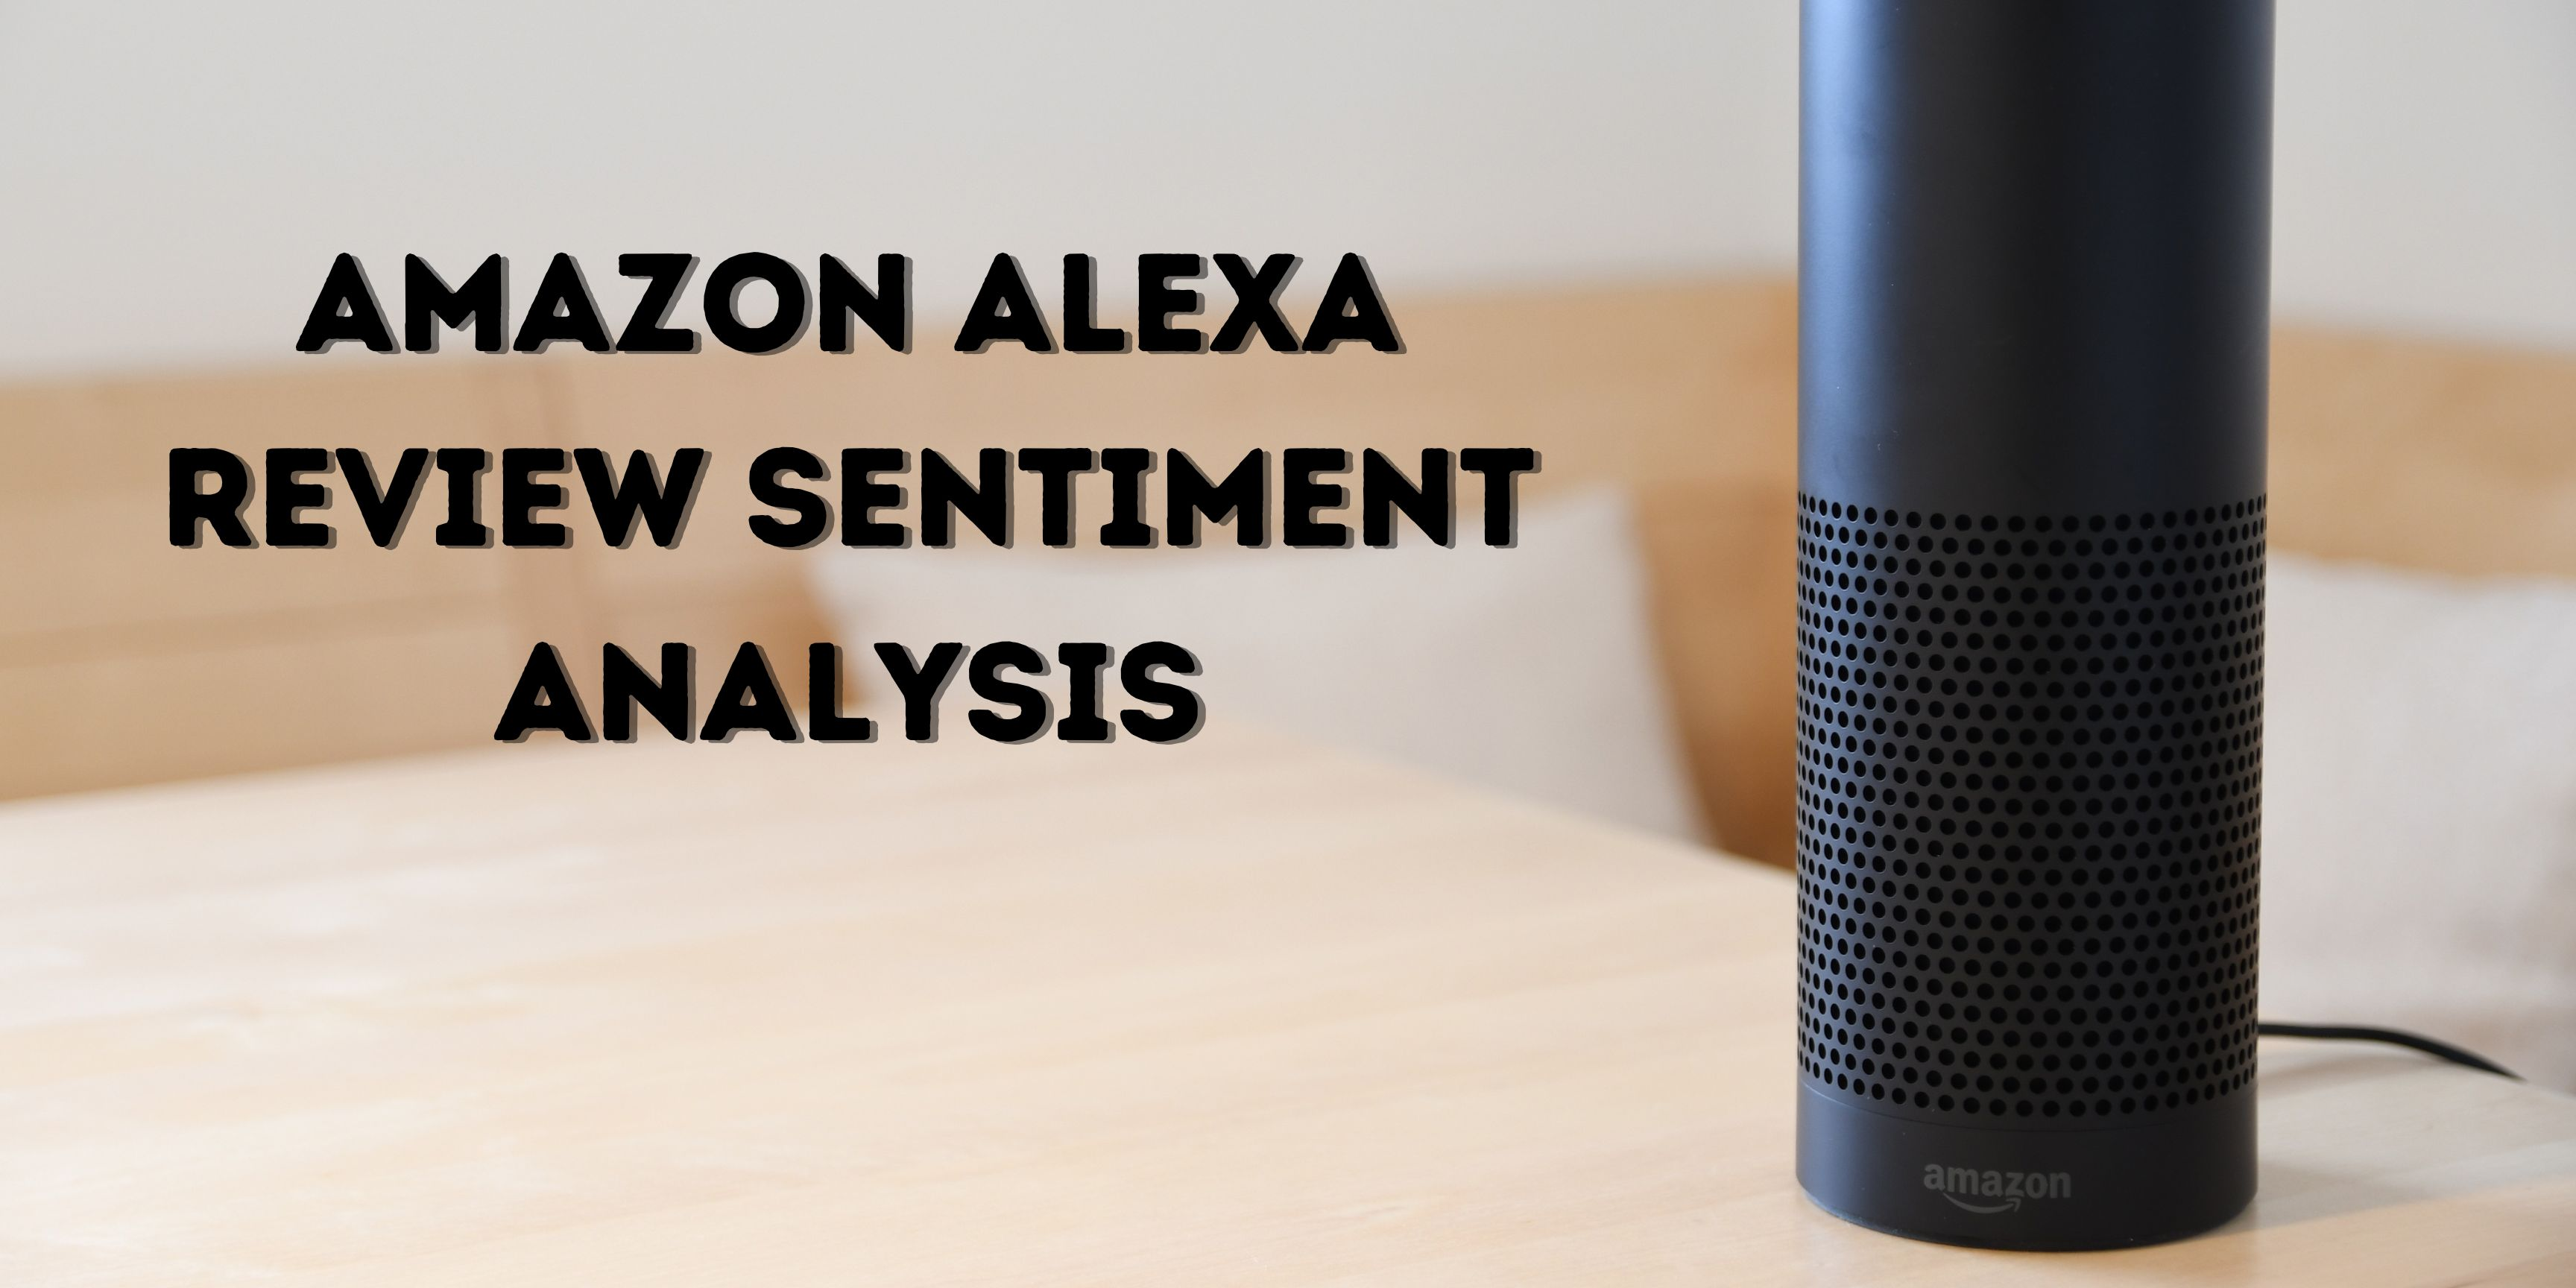

### Source of Dataset

Kaggle: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews/code?datasetId=39657&sortBy=voteCount

### Pre-trained Model

sohan-ai/sentiment-analysis-model-amazon-reviews: https://huggingface.co/sohan-ai/sentiment-analysis-model-amazon-reviews

### Analysis Overview

This analysis focuses on a dataset containing nearly 3,000 Amazon customer reviews, star ratings, review dates, variants, and feedback on various Amazon Alexa products. Text normalization was performed using the NLTK library. An exploratory data analysis (EDA) was conducted to understand the dataset's distribution. Subsequently, a pre-trained Distilled BERT model, specifically 'sohan-ai/sentiment-analysis-model-amazon-reviews', was downloaded from the Hugging Face Transformers Library to perform sentiment analysis. The pre-trained model was trained trained on a dataset of Amazon reviews and fine-tuned to predict whether a given Amazon review is positive or negative based on the review text. 

### Import Essential Libraries

In [156]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# check version of the essential libraries
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn version:', sns.__version__)

pandas version: 1.4.2
numpy version: 1.26.4
seaborn version: 0.13.2


### Load the Dataset

In [157]:
# load the dataset
data = pd.read_csv('../data/amazon_alexa.tsv', sep='\t')

# check the dimension of the dataset
numrow, numcol = data.shape
print(f'The dataset contains {numrow} rows and {numcol} columns.')

# check the attributes in the dataset
attributes = data.columns
print('Attributes in the dataset:', attributes)

# view the first 5 rows of the dataset
data.head()

The dataset contains 3150 rows and 5 columns.
Attributes in the dataset: Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [158]:
# summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [159]:
# check the duplicates and missing value in the dataset
print('Number of duplicate records in the dataset:', data.duplicated().sum())
print('Total number of missing value in each attributes:')
print(data.isna().sum())

Number of duplicate records in the dataset: 715
Total number of missing value in each attributes:
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [160]:
# convert the 'date' column into datetime format
data['date'] = pd.to_datetime(data['date'])

### Text Normalization

In [161]:
# define a function to normalize the review text (remove stopwords, punctuation, lemmatization)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
import re

lemmatizer = WordNetLemmatizer()

stopwords = stopwords.words('english')
add_stopwords = ['Amazon','Alexa']
stopwords = stopwords + add_stopwords
pattern = r'[^\w\s]' #  matches any character that is not a word character (\w) or whitespace (\s)

def text_normalization(text):
    texts = re.sub(pattern, '', text)
    tokens = word_tokenize(texts)
    fil_tokens = [token for token in tokens if token.lower() not in stopwords]
    fil_tokens_lemma = [lemmatizer.lemmatize(token) for token in fil_tokens]
    joined_text = ' '.join(map(str, fil_tokens_lemma))
    return joined_text

In [163]:
# insert a new column for the normalized text data
data['normalized_text'] = data['verified_reviews'].apply(lambda x: text_normalization(x))

### Exploratory Data Analysis (EDA)

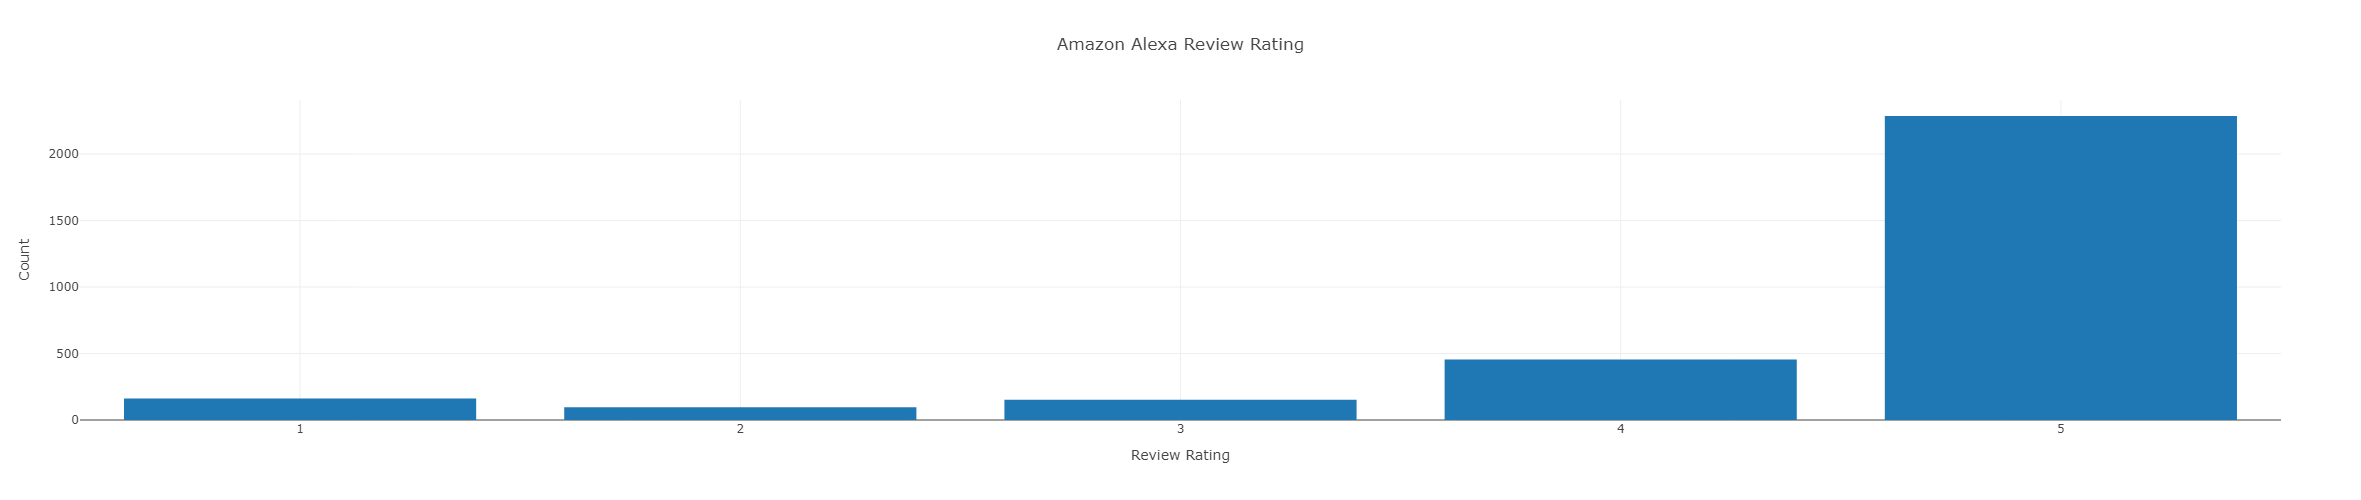

In [164]:
# check the distribution of the variable 'rating'
rating = data['rating'].value_counts().sort_index()
rating_df = pd.DataFrame(rating).reset_index()
rating_df.columns = ['Rating', 'Count']

fig = px.bar(rating_df, 
             x='Rating', y='Count', 
             width=800, height=500, 
             template='gridon', 
             title='Amazon Alexa Review Rating')

fig.update_layout(
    xaxis = dict(
        title = 'Review Rating'
    ),
    yaxis = dict(
        title = 'Count'
    )
    
)
fig.show()

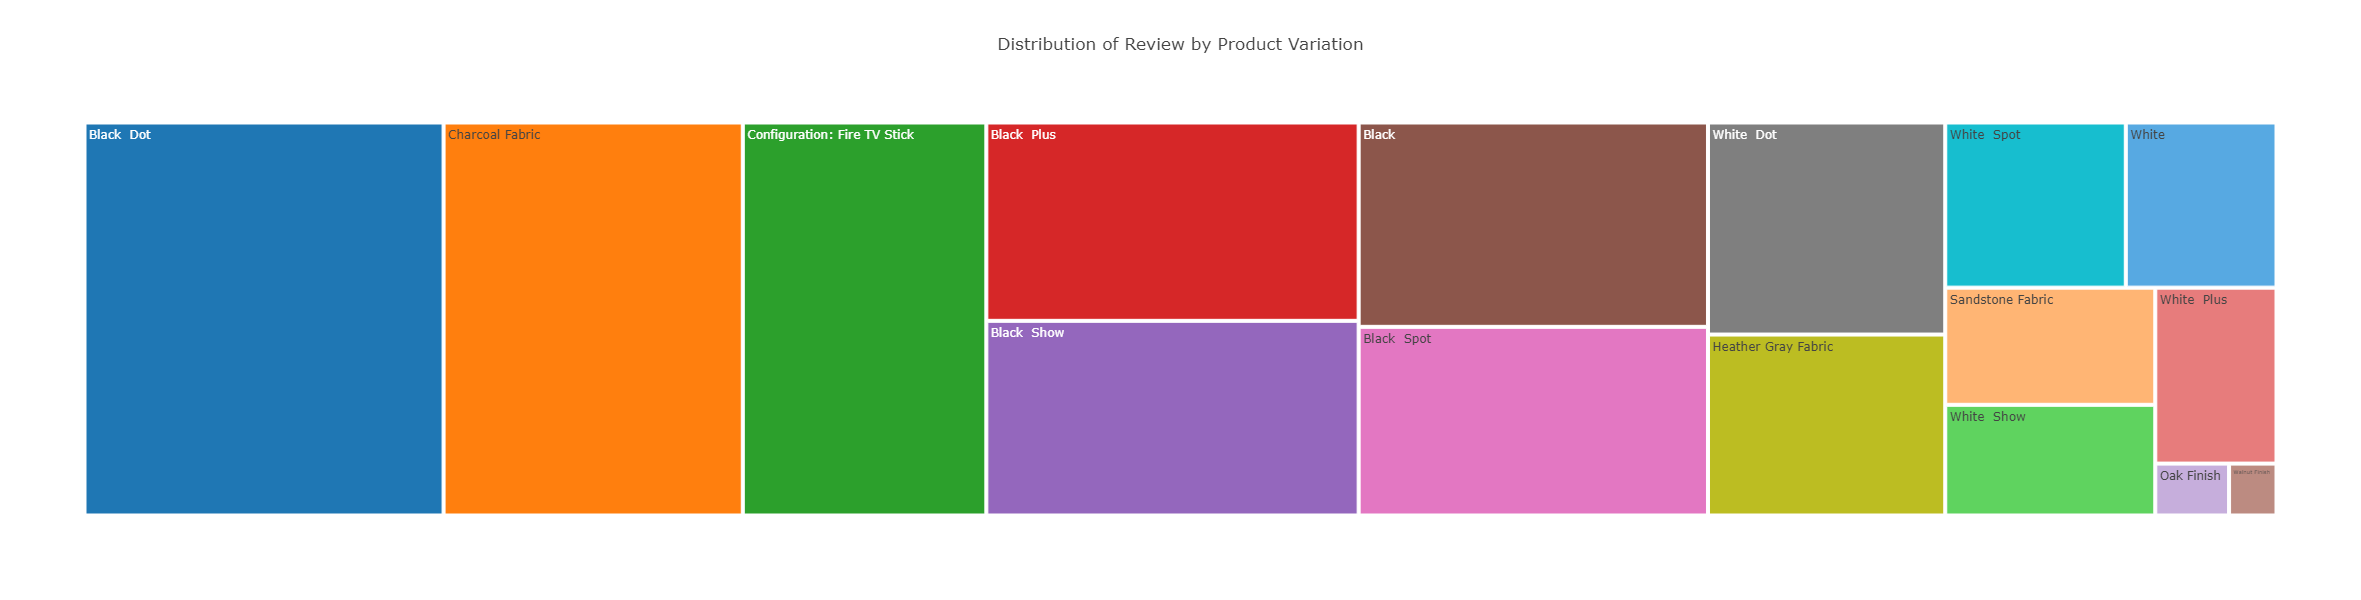

In [165]:
# check the number of variation of the Alexa in the review data
variation = data['variation'].value_counts().sort_values(ascending=False)
variation_df = pd.DataFrame(variation).reset_index()
variation_df.columns = ['Variation', 'Count']

fig = px.treemap(variation_df, 
                 path=[variation_df['Variation']], 
                 values='Count', 
                 width=800, height=600, 
                 template='gridon', 
                 title='Distribution of Review by Product Variation')

fig.show()

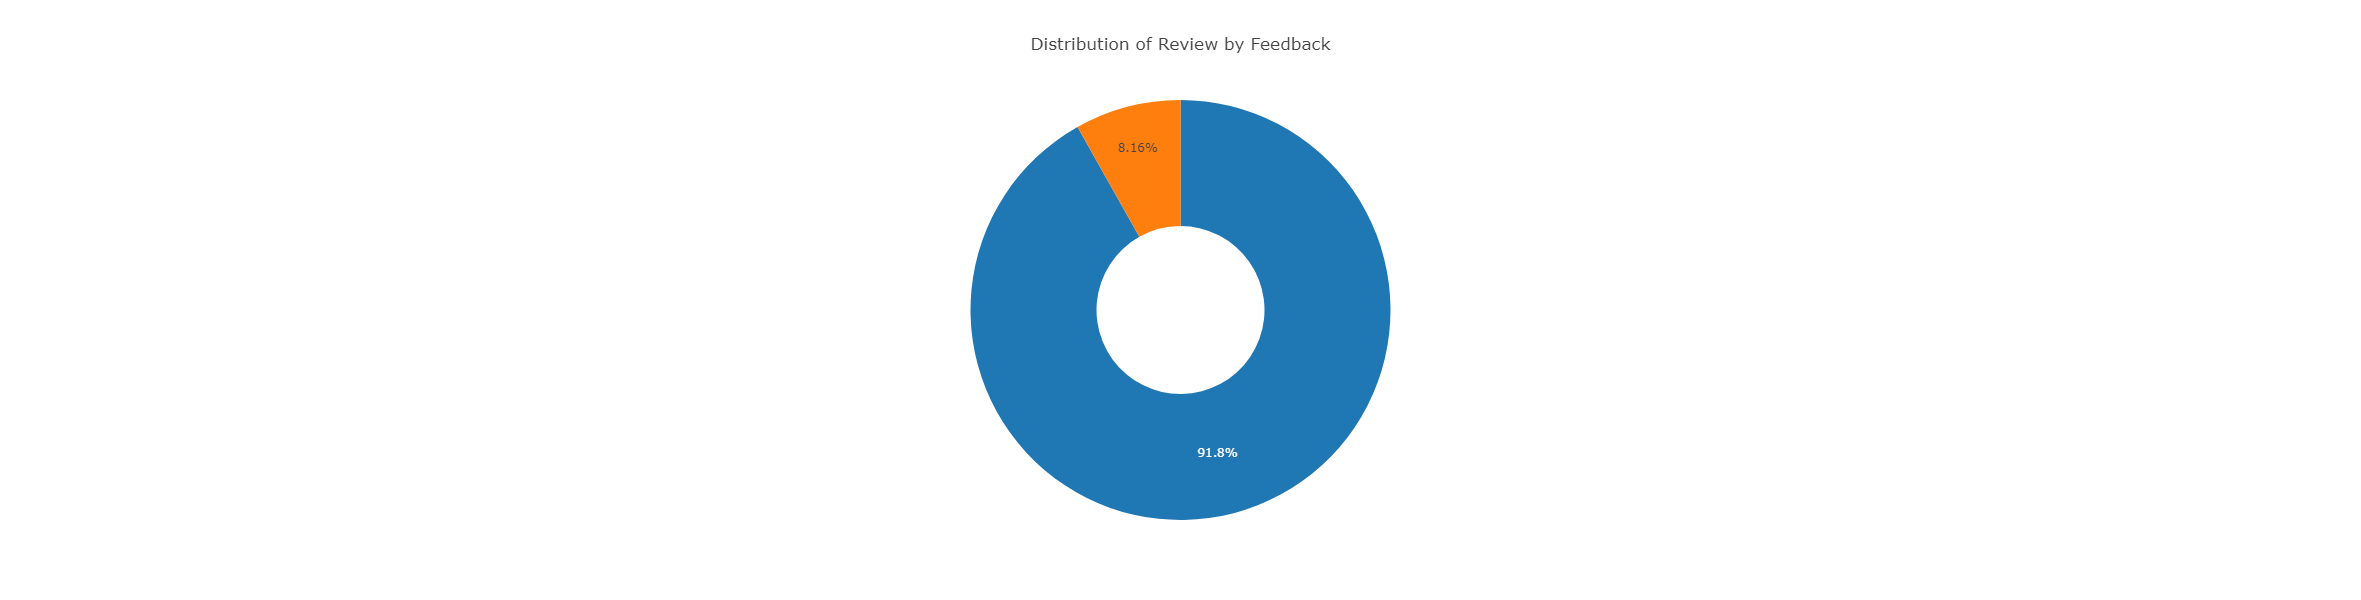

In [167]:
# check the distribution of the feedback in the review data
feedback = data['feedback'].value_counts().sort_index()
feedback_df = pd.DataFrame(feedback).reset_index()
feedback_df.columns = ['Feedback', 'Count']

fig = px.pie(feedback_df, 
             values='Count', 
             hole=0.4, 
             width=600, height=600, 
             template='gridon', 
             title='Distribution of Review by Feedback')

fig.show()

In [166]:
# insert a new column 'year' in the dataset
data['year'] = pd.DatetimeIndex(data['date']).year

# insert a new column 'month' in the dataset
data['month'] = pd.DatetimeIndex(data['date']).month

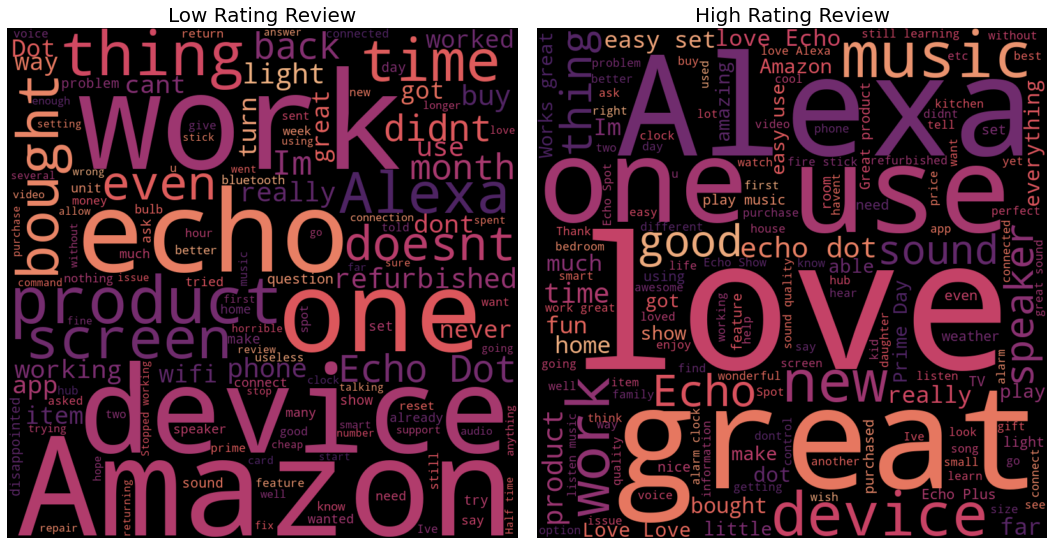

In [169]:
from wordcloud import WordCloud

data_low = data[data['rating']==1]
data_high = data[data['rating']==5]

combined_text_low = ' '.join(data_low['normalized_text'])
combined_text_high = ' '.join(data_high['normalized_text'])


# create a word cloud using the combined text
wordcloud_low = WordCloud(width = 800, height = 800,
                            background_color ='black',
                            colormap = 'flare',
                            min_font_size = 15).generate(combined_text_low)

wordcloud_high = WordCloud(width = 800, height = 800,
                            background_color ='black',
                            colormap = 'flare',
                            min_font_size = 15).generate(combined_text_high)

# plot the WordCloud image
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(wordcloud_low, interpolation='bilinear')
ax[0].set_title('Low Rating Review', fontsize=20)
ax[0].axis('off')

ax[1].imshow(wordcloud_high, interpolation='bilinear')
ax[1].set_title('High Rating Review', fontsize=20)
ax[1].axis('off')


plt.tight_layout(pad=2)
plt.show()

### Sentiment Analysis 

In [46]:
# !pip -qqq install -q transformers
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# download the pre-trained model from HuggingFace
model_name = "sohan-ai/sentiment-analysis-model-amazon-reviews"

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\65814\anaconda3\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\65814\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/646 [00:00<?, ?B/s]

C:\Users\65814\anaconda3\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\65814\.cache\huggingface\hub\models--sohan-ai--sentiment-analysis-model-amazon-reviews. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [170]:
# define a function to perform sentiment analysis on each review text
def sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    # make prediction
    outputs = model(**inputs)
    predicted_label = 'positive' if outputs.logits.argmax().item() == 1 else 'negative'
    return predicted_label

In [171]:
# insert a new column 'label' contains the predicted label from the sentiment analysis using pre-trained model from HuggingFace
data['label'] = data['verified_reviews'].apply(lambda x: sentiment_analysis(x))

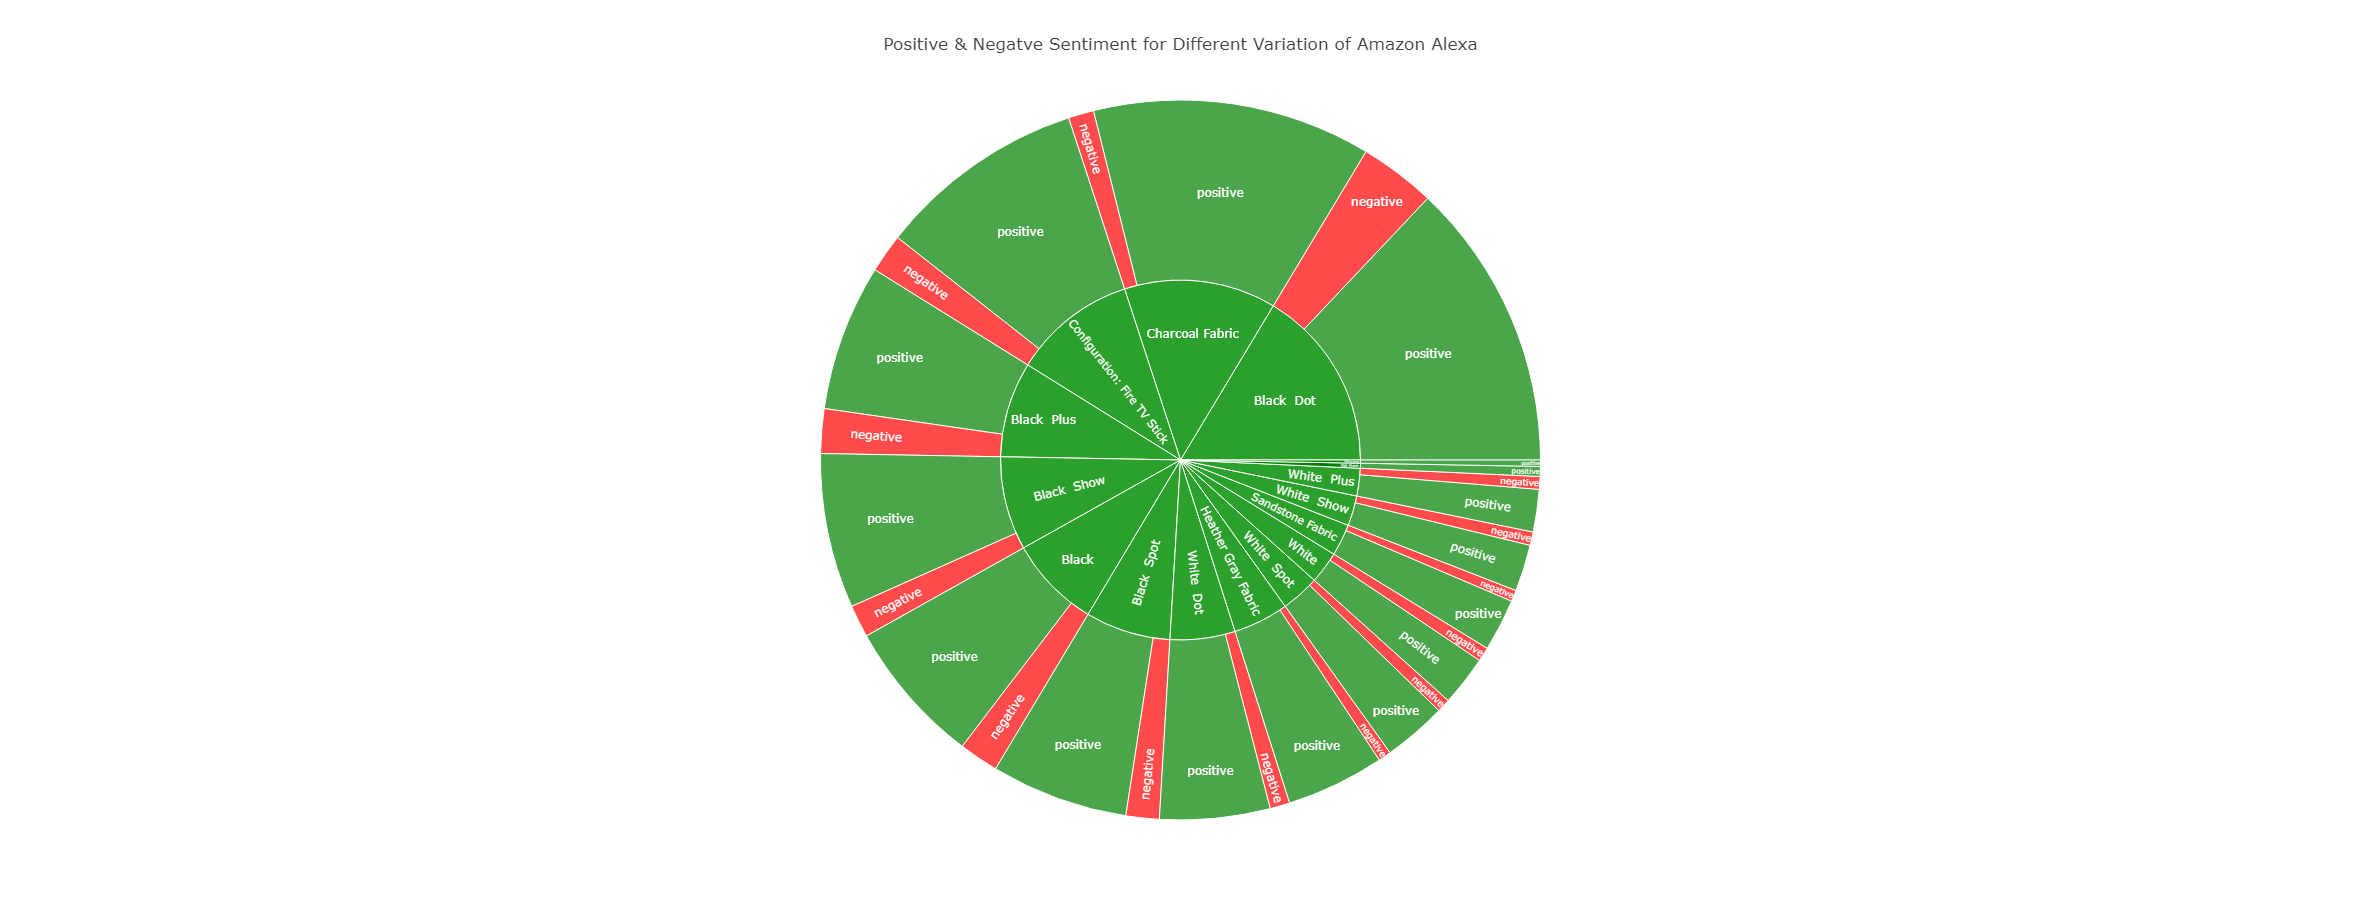

In [172]:
# distribution of the positive and negative sentiment by the variation of the Amazon Alexa
fig = px.sunburst(data, 
                  path=['variation','label'], 
                  color='label', 
                  color_discrete_map={'positive': 'green', 'negative': 'red'}, 
                  width=1400, height=900, 
                  template='gridon', 
                  title='Positive & Negatve Sentiment for Different Variation of Amazon Alexa')
fig.show()

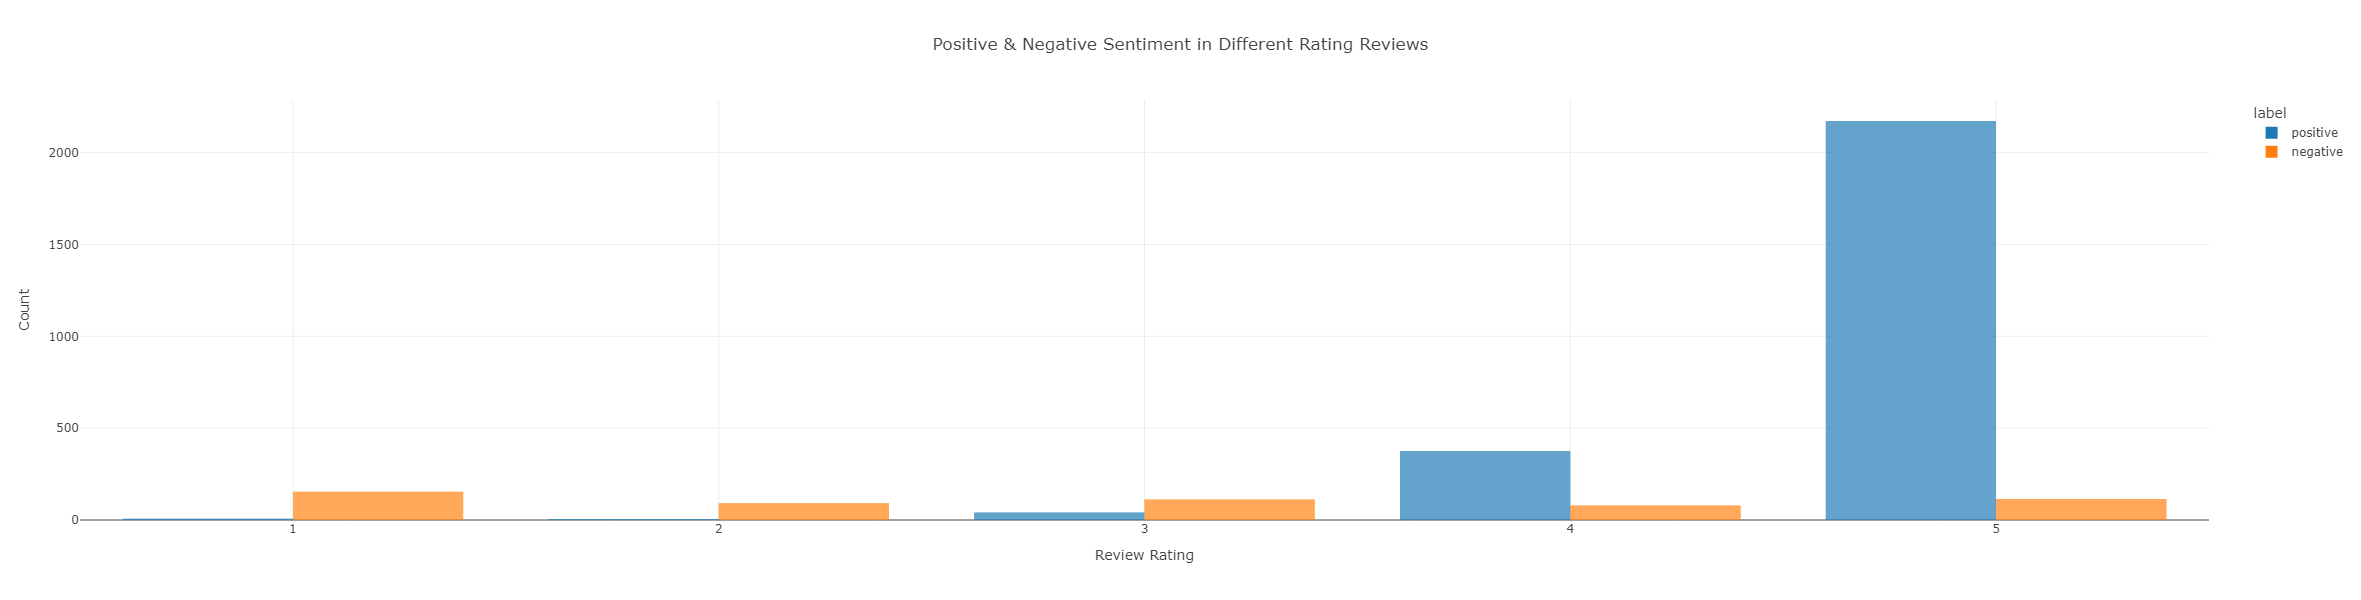

In [174]:
# distribution of positive and negative sentiment in different rating review
data['rating'] = data['rating'].astype(str)

fig = px.bar(data, 
             x='rating', 
             color='label', 
             barmode='group', 
             width=800, height=600, 
             template='gridon', 
             title='Positive & Negative Sentiment in Different Rating Reviews')

fig.update_layout(
    xaxis = dict(
        title = 'Review Rating'
    ),
    yaxis = dict(
        title = 'Count'
    )
)

fig.show()

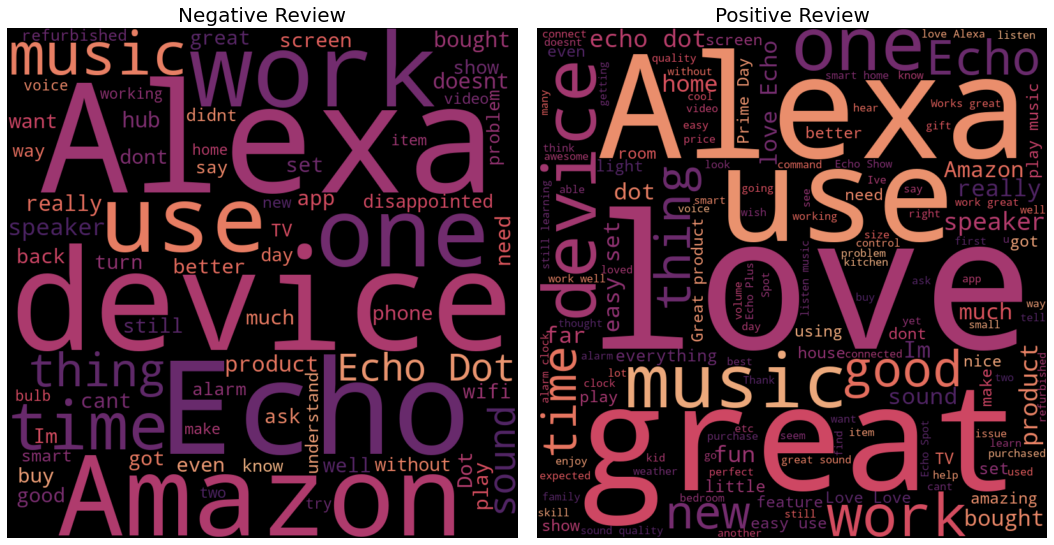

In [176]:
# visualization of keywords in negative and positive sentiment via wordcloud
data_negative = data[data['label']=='negative']
data_positive = data[data['label']=='positive']

combined_text_neg = ' '.join(data_negative['normalized_text'])
combined_text_pos = ' '.join(data_positive['normalized_text'])


# create a word cloud using the combined text
wordcloud_neg = WordCloud(width = 800, height = 800,
                            background_color ='black',
                            colormap = 'flare',
                            min_font_size = 15).generate(combined_text_neg)

wordcloud_pos = WordCloud(width = 800, height = 800,
                            background_color ='black',
                            colormap = 'flare',
                            min_font_size = 15).generate(combined_text_pos)

# plot the WordCloud image
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(wordcloud_neg, interpolation='bilinear')
ax[0].set_title('Negative Review', fontsize=20)
ax[0].axis('off')

ax[1].imshow(wordcloud_pos, interpolation='bilinear')
ax[1].set_title('Positive Review', fontsize=20)
ax[1].axis('off')


plt.tight_layout(pad=2)
plt.show()